# CIFAR10
## 10개의 다른 클래스로 구성된 6만개의 32x32 의 컬러 이미지
### 훈련 셋은 클래스마다 5000개 총 5만개
### 테스트 셋은 클래스마다 1000개 총 1만개

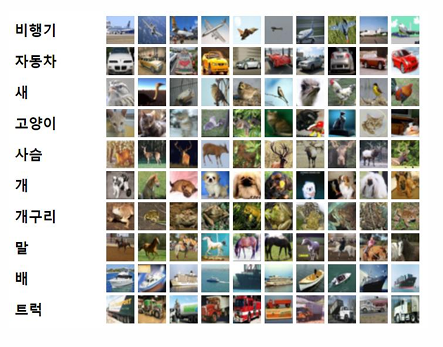

In [43]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


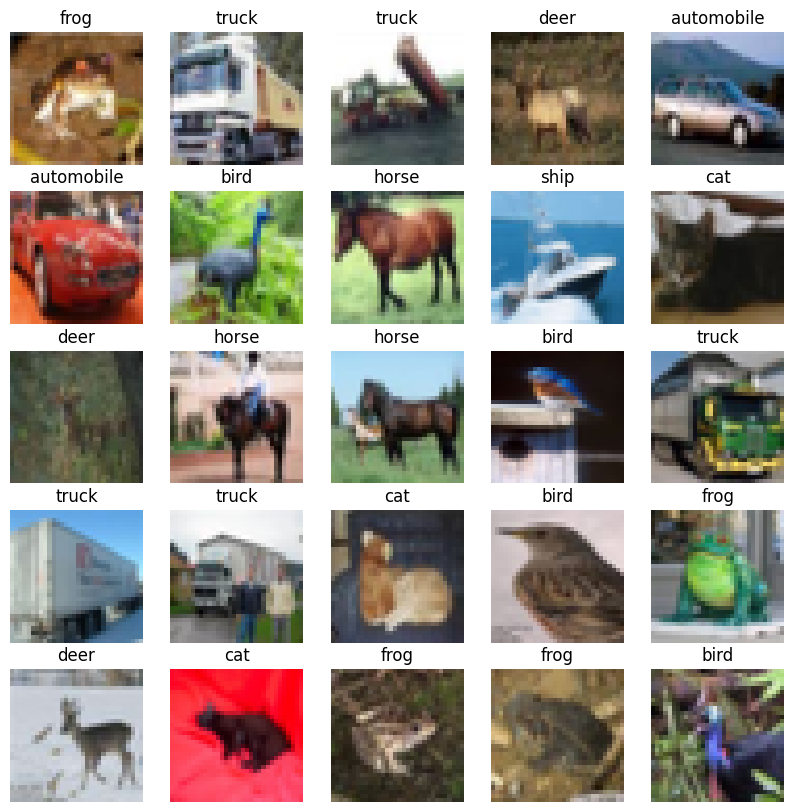

In [ ]:
# 클래스 레이블 매핑
class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

# 샘플 데이터 출력
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [29]:
c_model = Sequential()

c_model.add(Input(shape=(32, 32, 3)))
c_model.add(Conv2D(kernel_size=(3, 3), filters=32, activation="relu"))
c_model.add(Conv2D(kernel_size=(3, 3), filters=64, activation="relu"))
c_model.add(MaxPool2D(pool_size=(2, 2)))
c_model.add(Dropout(0.25))

c_model.add(Flatten())

c_model.add(Dense(128, activation="relu"))
c_model.add(Dropout(0.5))
c_model.add(Dense(10, activation="softmax"))

In [30]:
c_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)
c_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
early_stop = EarlyStopping(
    monitor="val_loss",  # 검증 손실을 기준으로
    patience=3,  # 3번 개선 안 되면 중단
    restore_best_weights=True,  # 가장 좋은 가중치로 되돌림
)


c_history = c_model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step - accuracy: 0.3329 - loss: 1.8230 - val_accuracy: 0.5633 - val_loss: 1.2470
Epoch 2/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - accuracy: 0.5388 - loss: 1.3001 - val_accuracy: 0.6362 - val_loss: 1.0529
Epoch 3/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.6000 - loss: 1.1374 - val_accuracy: 0.6627 - val_loss: 0.9866
Epoch 4/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.6276 - loss: 1.0565 - val_accuracy: 0.6626 - val_loss: 0.9674
Epoch 5/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.6508 - loss: 0.9878 - val_accuracy: 0.6830 - val_loss: 0.9122
Epoch 6/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6696 - loss: 0.9317 - val_accuracy: 0.6861 - val_loss: 0.9027
Epoch 7/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6851 - loss: 0.8888 - val_accuracy: 0.6925 - val_loss: 0.8814
Epoch 8/30
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.7022 - loss: 0.8441 - 

In [32]:
c_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7012 - loss: 0.8461


[0.8545960187911987, 0.70169997215271]

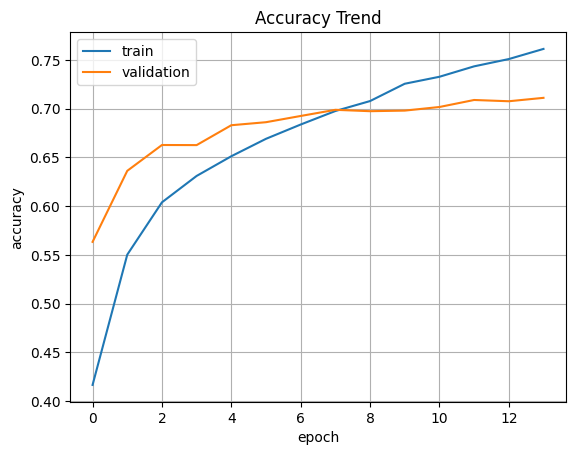

In [41]:
plt.plot(c_history.history["accuracy"])
plt.plot(c_history.history["val_accuracy"])
plt.title("Accuracy Trend")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

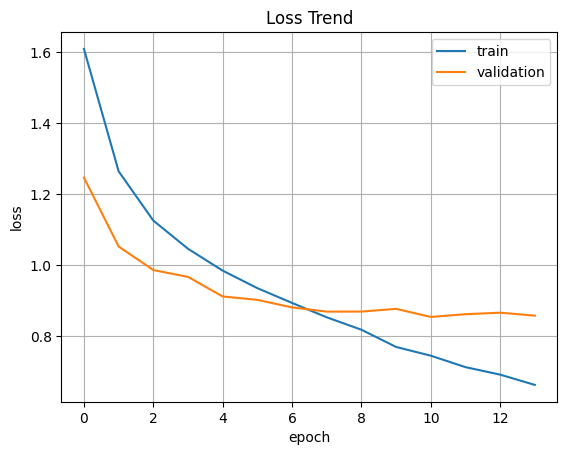

In [42]:
plt.plot(c_history.history["loss"])
plt.plot(c_history.history["val_loss"])
plt.title("Loss Trend")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc="best")
plt.grid()
plt.show()

# 하이퍼 파라미터 튜닝

In [38]:
%pip install keras-tuner

Note: you may need to restart the kernel to use updated packages.


파라미터 튜닝 colab 코드

https://colab.research.google.com/drive/1yJ6xk4EQILP_8znFNSRYeFJ1miq5-33w?usp=sharing

* 모델을 더 깊게 Dense, conv2d, maxpooling 을 추가해보자

## ImageDataGenerator
### 데이터 전처리의 일종
### 데이터 이미지를 회전, 변형, 가로 세로 이동, 뒤집기 같이 이미지 데이터를 수정하여 학습시켜 여러가지 상황에서 학습하게 설정함

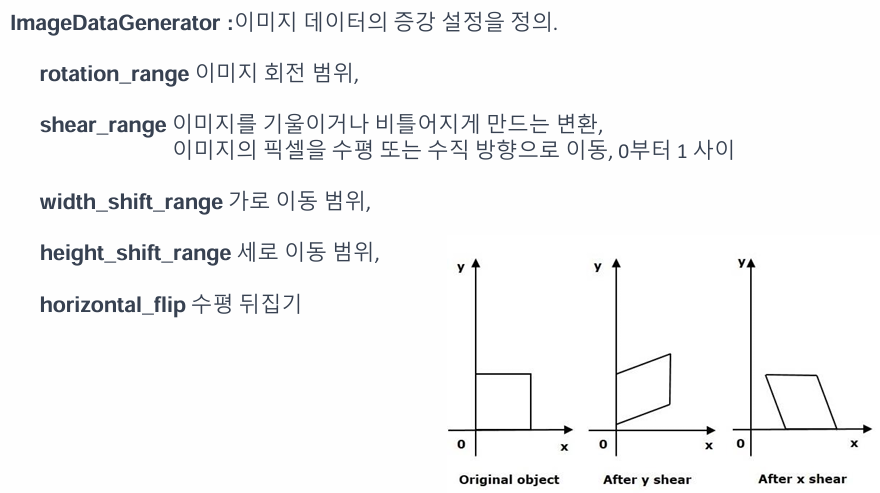

이미지 생성기를 쓴 코드

https://colab.research.google.com/drive/1h9cUwMwr-9BGQvt3bpdvPC65SLBvnIL-?usp=sharing